# SVM

SVM vs SVC
- 支持向量機(SVM，Support Vector Machine)，包括分類(SVC)和回歸(SVR)。
- 支持向量分類器(SVC，Support Vector Classifier)，SVC是專門用於分類問題的SVM。

In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# 加載Iris數據集
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 打印數據集的鍵和特徵名稱
print(iris.keys())
print(iris.feature_names)
print(iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# 獲取數據集的目標名稱和標籤
target_names = iris.target_names
labels = target_names[target]

In [6]:
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [7]:
# 1D
a = [1,2,3]
b = [4,5,6]
print(f'np.c for 1d: \n{np.c_[a,b]}')
print(f'np.r for 1d: \n{np.r_[a,b]}')
print('-'*20)

# 2D
c = [[1,2,3],[4,5,6]]
d = [[7,8,9],[10,11,12]]
print(f'np.c for 2d: \n{np.c_[c,d]}')
print(f'np.r for 2d: \n{np.r_[c,d]}')

np.c for 1d: 
[[1 4]
 [2 5]
 [3 6]]
np.r for 1d: 
[1 2 3 4 5 6]
--------------------
np.c for 2d: 
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
np.r for 2d: 
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [8]:
# 分別獲取每種類別的花瓣長度和寬度
setosa_petal_length = features[labels == 'setosa', 2]
setosa_petal_width = features[labels == 'setosa', 3]
setosa = np.c_[setosa_petal_length, setosa_petal_width]

versicolor_petal_length = features[labels == 'versicolor', 2]
versicolor_petal_width = features[labels == 'versicolor', 3]
versicolor = np.c_[versicolor_petal_length, versicolor_petal_width]

virginica_petal_length = features[labels == 'virginica', 2]
virginica_petal_width = features[labels == 'virginica', 3]
virginica = np.c_[virginica_petal_length, virginica_petal_width]

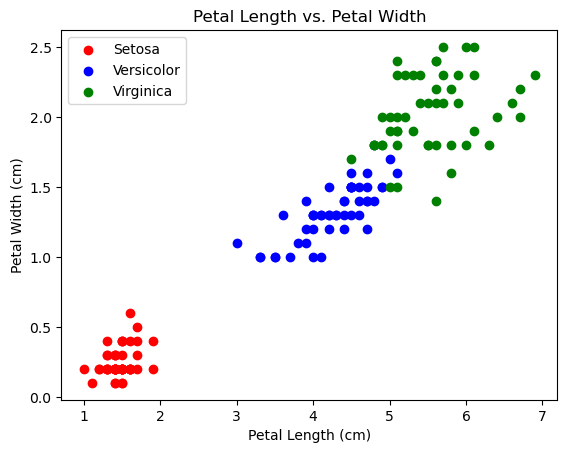

In [9]:
# 繪製數據點分佈
plt.scatter(setosa[:, 0], setosa[:, 1], color='red', label='Setosa')
plt.scatter(versicolor[:, 0], versicolor[:, 1], color='blue', label='Versicolor')
plt.scatter(virginica[:, 0], virginica[:, 1], color='green', label='Virginica')

# 設置圖表標題和軸標籤
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs. Petal Width')
# 顯示圖例
plt.legend()
# 顯示圖表
plt.show()

In [10]:
# 合併所有訓練數據和標籤
training_data = np.r_[setosa, versicolor, virginica]
training_labels = np.r_[np.zeros(len(setosa)), np.ones(len(versicolor)), np.ones(len(virginica)) * 2]

In [11]:
# 創建並訓練線性SVM分類器
clf = svm.LinearSVC(max_iter=10000, dual='auto')
clf.fit(training_data, training_labels)

LinearSVC(dual='auto', max_iter=10000)

In [12]:
# 定義網格範圍，用於繪製決策邊界
training_x_min, training_x_max = training_data[:, 0].min() - 1, training_data[:, 0].max() + 1
training_y_min, training_y_max = training_data[:, 1].min() - 1, training_data[:, 1].max() + 1
grid_interval = 0.01

# 生成網格點
xx, yy = np.meshgrid(np.arange(training_x_min, training_x_max, grid_interval),
                     np.arange(training_y_min, training_y_max, grid_interval))
print(f'xx:{xx}')
print(f'yy:{yy}')

xx:[[0.   0.01 0.02 ... 7.87 7.88 7.89]
 [0.   0.01 0.02 ... 7.87 7.88 7.89]
 [0.   0.01 0.02 ... 7.87 7.88 7.89]
 ...
 [0.   0.01 0.02 ... 7.87 7.88 7.89]
 [0.   0.01 0.02 ... 7.87 7.88 7.89]
 [0.   0.01 0.02 ... 7.87 7.88 7.89]]
yy:[[-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 [-0.89 -0.89 -0.89 ... -0.89 -0.89 -0.89]
 [-0.88 -0.88 -0.88 ... -0.88 -0.88 -0.88]
 ...
 [ 3.47  3.47  3.47 ...  3.47  3.47  3.47]
 [ 3.48  3.48  3.48 ...  3.48  3.48  3.48]
 [ 3.49  3.49  3.49 ...  3.49  3.49  3.49]]


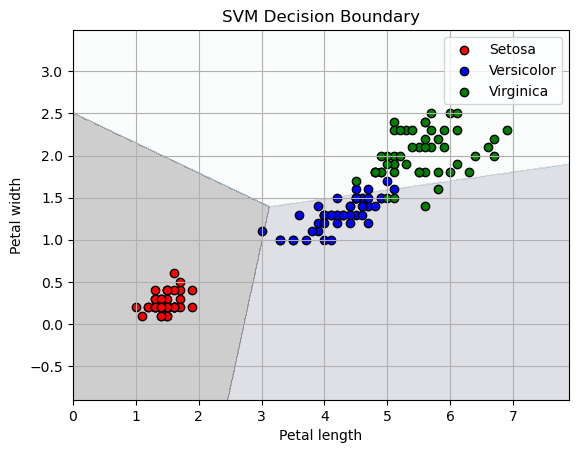

In [13]:
# 使用分類器預測每個網格點的類別
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 繪製決策邊界
plt.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.2)
plt.autoscale()
plt.grid()

# 繪製數據點
plt.scatter(setosa[:, 0], setosa[:, 1], color='red', edgecolor='k', label='Setosa')
plt.scatter(versicolor[:, 0], versicolor[:, 1], color='blue', edgecolor='k', label='Versicolor')
plt.scatter(virginica[:, 0], virginica[:, 1], color='green', edgecolor='k', label='Virginica')

# 添加標籤和圖例
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()

# 重要參數

## C: 懲罰係數，C愈大代表容忍錯誤的程度愈低，愈容易造成過度擬和的問題。
## gamma: 決定支援向量的多寡，影響訓練速度與預測速度 ('scale','auto')
## kernel: 決定不同的核函數，如: linear, poly, rbf, sigmoid等等
https://scikit-learn.org/stable/modules/svm.html<br>
svm.LinearSVC (Linear Support Vector Classification)與svm.SVC(kernel=’linear’)差異<br>
https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [14]:
# 匯入必要的函式庫
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 加載Iris數據集
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [15]:
def SVM_plot(clf, title):
    """
    繪製支持向量機分類結果圖
    """
    # 定義繪圖範圍
    training_x_min = training_data[:, 0].min() - 1
    training_x_max = training_data[:, 0].max() + 1
    training_y_min = training_data[:, 1].min() - 1
    training_y_max = training_data[:, 1].max() + 1
    grid_interval = 0.02
    xx, yy = np.meshgrid(np.arange(training_x_min, training_x_max, grid_interval),
                         np.arange(training_y_min, training_y_max, grid_interval))
    
    # 預測網格點
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 繪製決策邊界
    plt.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.2)
    plt.autoscale()
    plt.grid()
    
    # 繪製散點圖
    plt.scatter(setosa[:, 0], setosa[:, 1], color='red', label='Setosa')
    plt.scatter(versicolor[:, 0], versicolor[:, 1], color='blue', label='Versicolor')
    plt.scatter(virginica[:, 0], virginica[:, 1], color='green', label='Virginica')
    plt.title(title)
    plt.legend()
    plt.show()

In [16]:
# 繪製網格
xx, yy = np.meshgrid(np.arange(training_x_min, training_x_max, grid_interval),
                     np.arange(training_y_min, training_y_max, grid_interval))
xx

array([[0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89],
       [0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89],
       [0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89],
       ...,
       [0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89],
       [0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89],
       [0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89]])

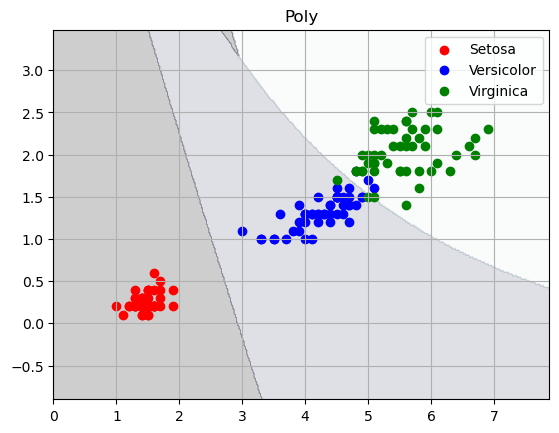

In [17]:
# 訓練支持向量機分類器
clf = svm.SVC(kernel='poly')
clf.fit(training_data, training_labels)
SVM_plot(clf, 'Poly')

## 換特徵

原2,3換成0,1
```
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
```

In [18]:
setosa_sepal_length=features[labels=='setosa',0]
setosa_sepal_width=features[labels=='setosa',1]
setosa=np.c_[setosa_sepal_length,setosa_sepal_width]

versicolor_sepal_length=features[labels=='versicolor',0]
versicolor_sepal_width=features[labels=='versicolor',1]
versicolor=np.c_[versicolor_sepal_length,versicolor_sepal_width]

virginica_sepal_length=features[labels=='virginica',0]
virginica_sepal_width=features[labels=='virginica',1]
virginica=np.c_[virginica_sepal_length,virginica_sepal_width]

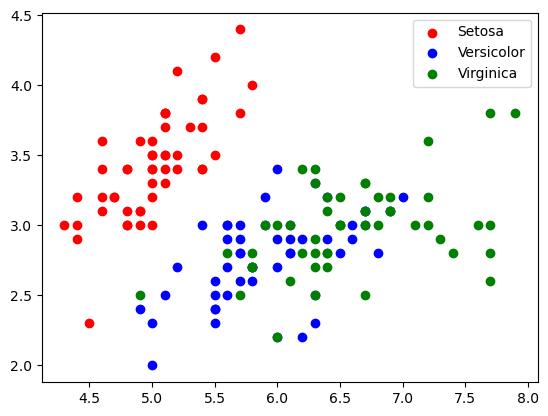

In [19]:
# 繪製散點圖
plt.scatter(setosa[:, 0], setosa[:, 1], color='red', label='Setosa')
plt.scatter(versicolor[:, 0], versicolor[:, 1], color='blue', label='Versicolor')
plt.scatter(virginica[:, 0], virginica[:, 1], color='green', label='Virginica')
plt.legend()
plt.show()

In [20]:
# 合併訓練數據和標籤
training_data = np.r_[setosa, versicolor, virginica]
training_labels = np.r_[np.zeros(len(setosa)), np.ones(len(versicolor)), np.ones(len(virginica)) * 2]

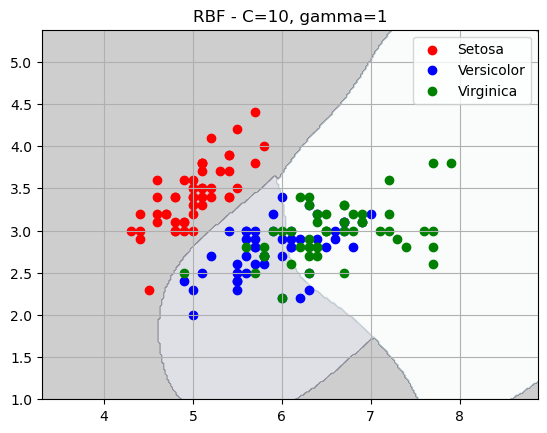

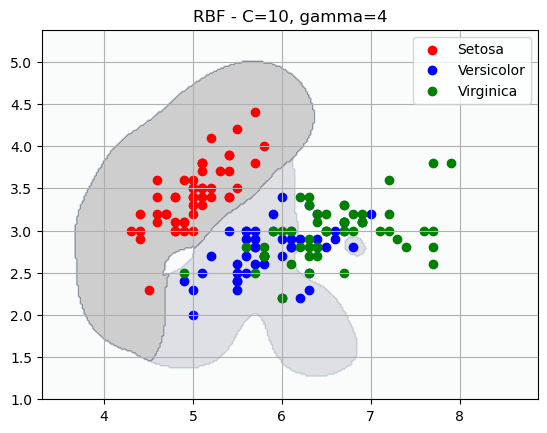

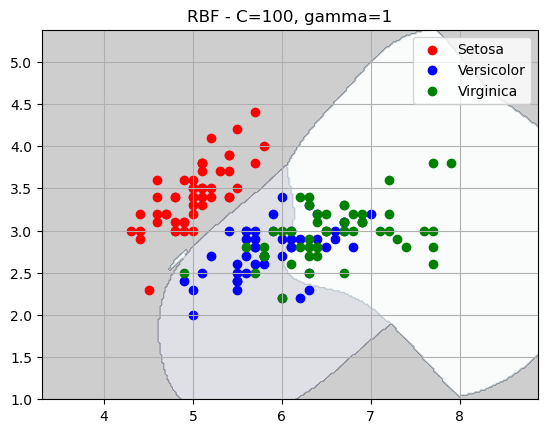

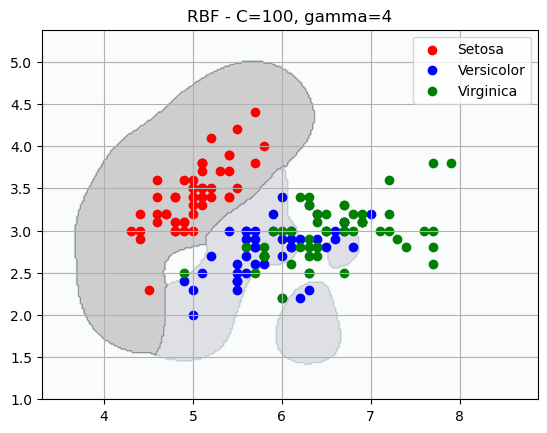

In [21]:
C = [10,100]
gamma = [1,4]
# 不同C和gamma組合的模型訓練及繪圖
for i in range(len(C)):
    for j in range(len(gamma)):
        clf = svm.SVC(kernel='rbf', C=C[i], gamma=gamma[j])
        clf.fit(training_data, training_labels)
        SVM_plot(clf, 'RBF - C={0}, gamma={1}'.format(C[i], gamma[j]))

# 參數調整（Parameter Tuning）

使用網格搜索(Grid Search)來調整SVM的參數

In [22]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    # 定義參數網格
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma': gammas}
    
    # 初始化GridSearchCV
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    
    # 適配模型
    grid_search.fit(X, y)
    
    # 返回最佳參數
    return grid_search.best_params_

# 整體流程

## Step1. 下載資料

In [23]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

## Step2. 區分訓練集與測試集

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

## Step3. 建模

In [25]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='poly')

## Step4. 預測

In [26]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## Step5. 準確度分析

In [27]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.9777777777777777


# 使用調參整體流程

## Iris

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm

# 加載Iris數據集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# 定義參數調整函數
def svc_param_selection(X, y, nfolds):
    param_grid = [
        {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
        {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]},
        {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]},
        {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]}
    ]
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_

# 在訓練集上調整參數
best_params, best_score = svc_param_selection(X_train, y_train, 5)
print("Best parameters found:", best_params)
print("Best cross-validation score:", best_score)

# 使用最佳參數重新訓練模型
best_svc = svm.SVC(kernel=best_params['kernel'], C=best_params['C'],
                   degree=best_params['degree'] if best_params['kernel'] == 'poly' else 3,
                   gamma=best_params.get('gamma', 'scale'))
best_svc.fit(X_train, y_train)

# 印出最佳 degree
if best_params['kernel'] == 'poly':
    print("Best degree:", best_params['degree'])

Best parameters found: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.980952380952381


In [30]:
# 使用最佳參數結果評估模型
train_accuracy = best_svc.score(X_train, y_train)
test_accuracy = best_svc.score(X_test, y_test)

print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Train accuracy: 0.9809523809523809
Test accuracy: 0.9777777777777777


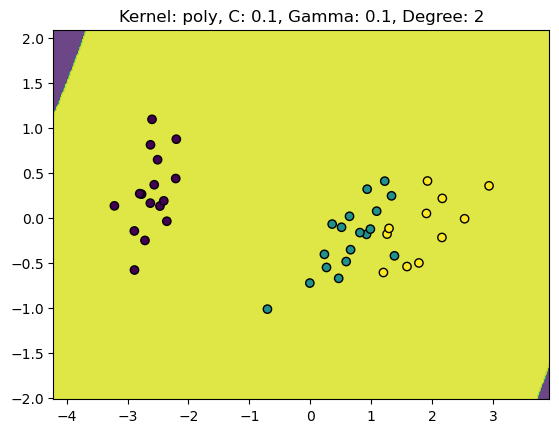

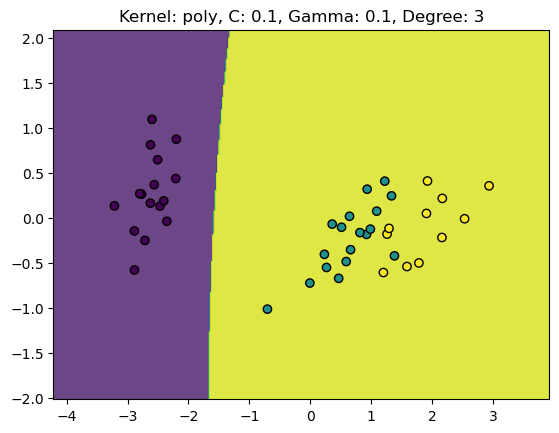

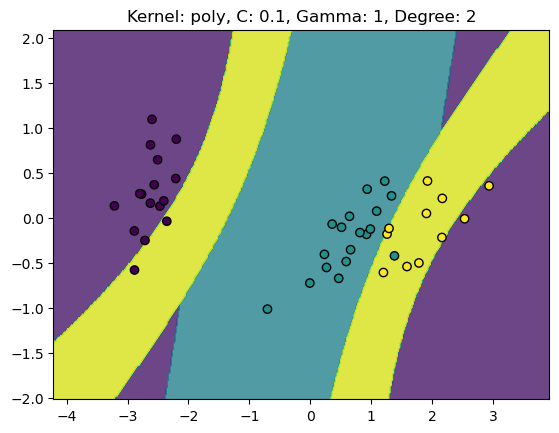

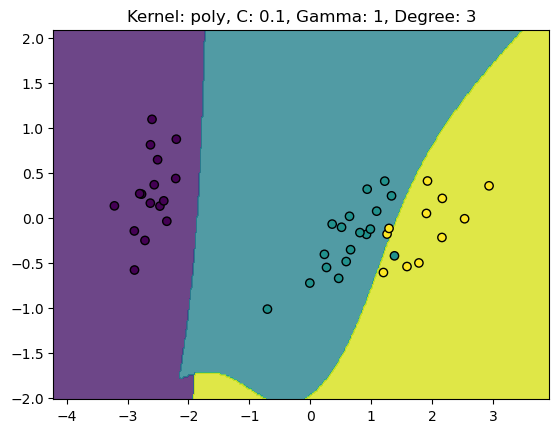

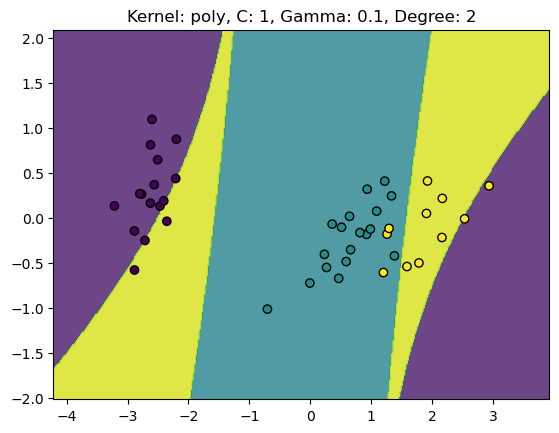

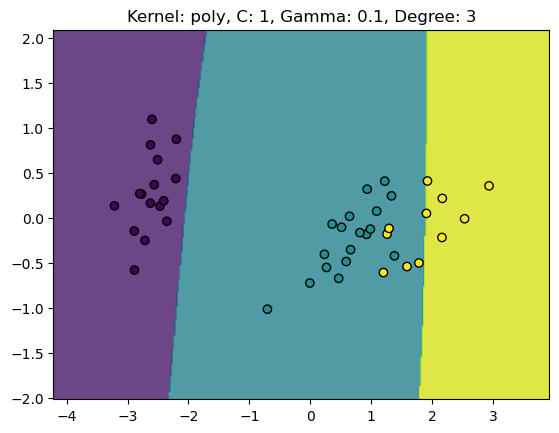

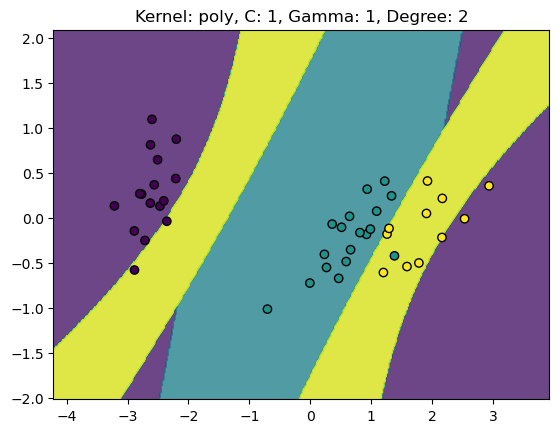

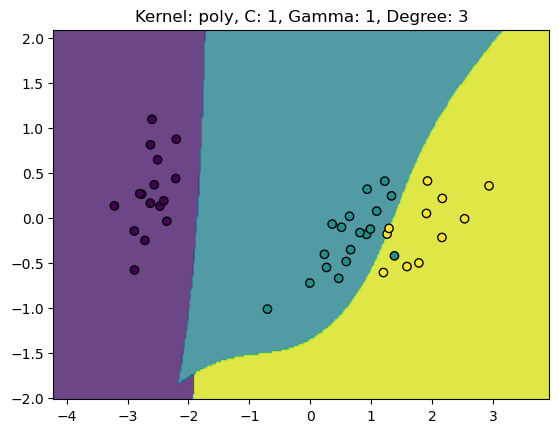

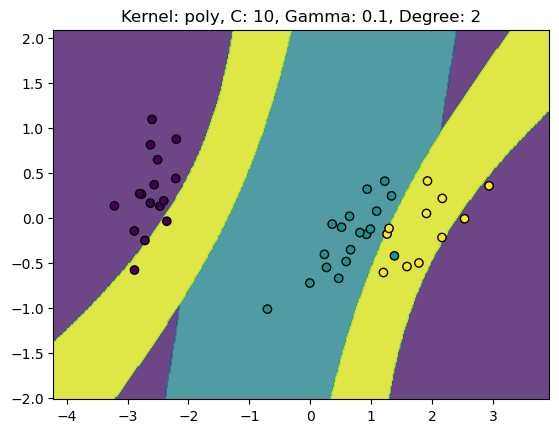

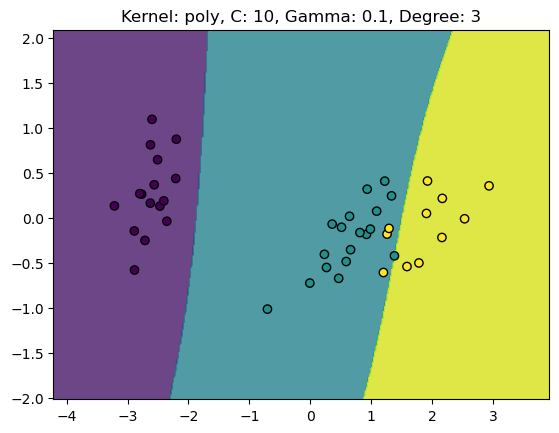

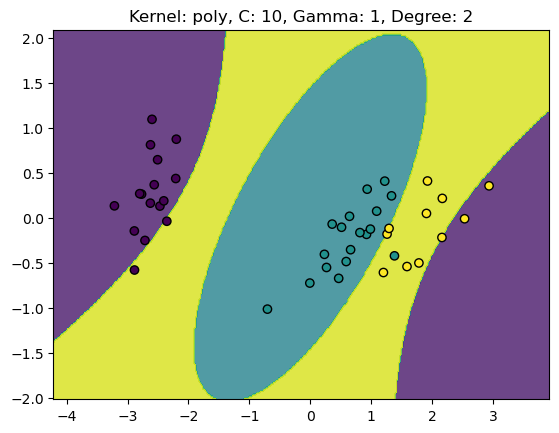

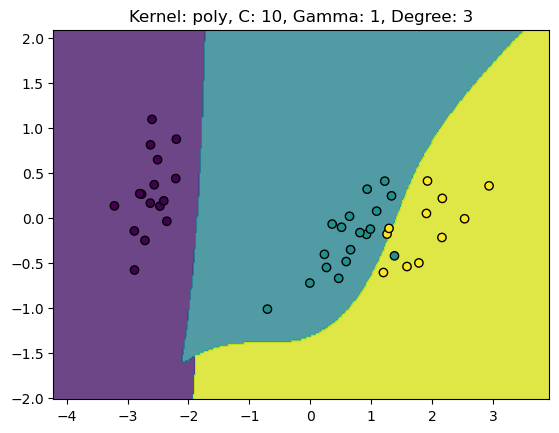

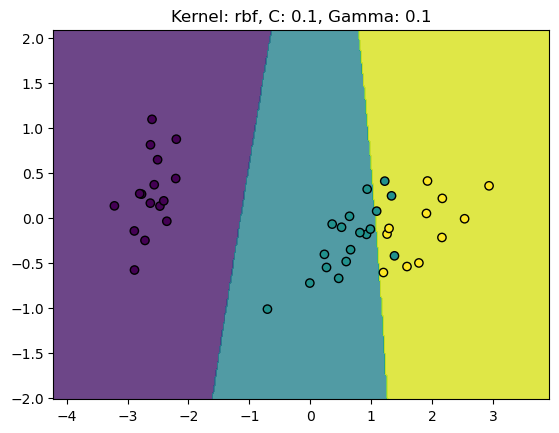

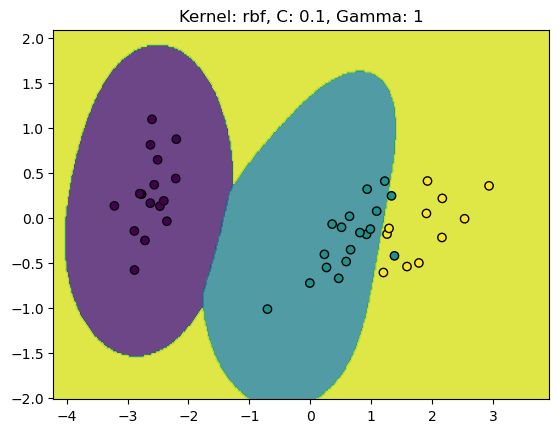

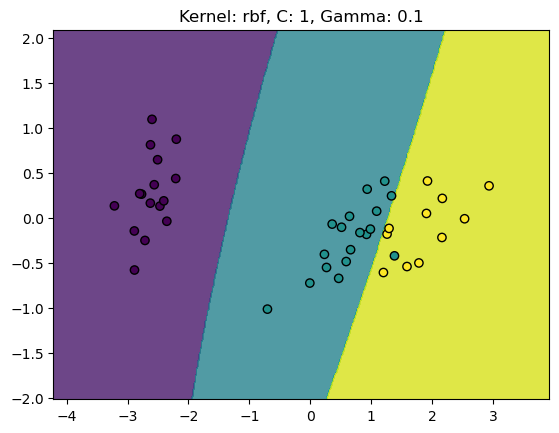

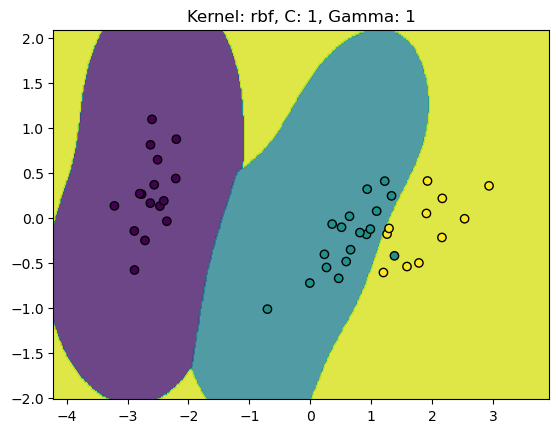

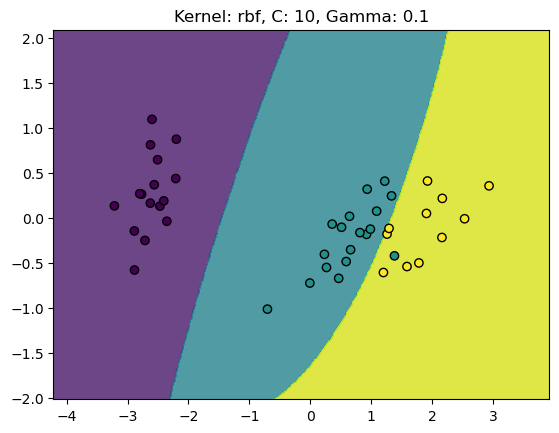

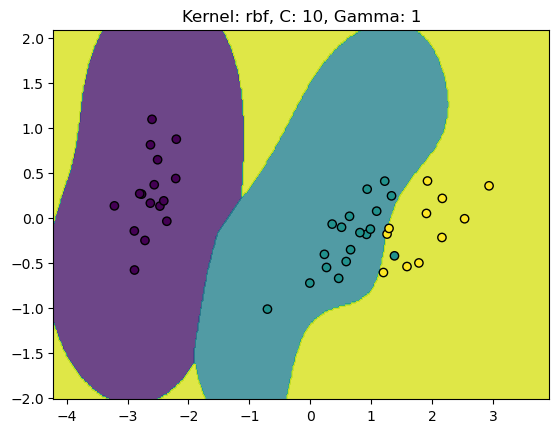

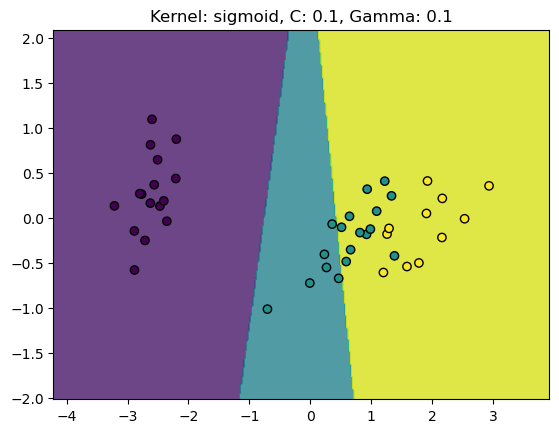

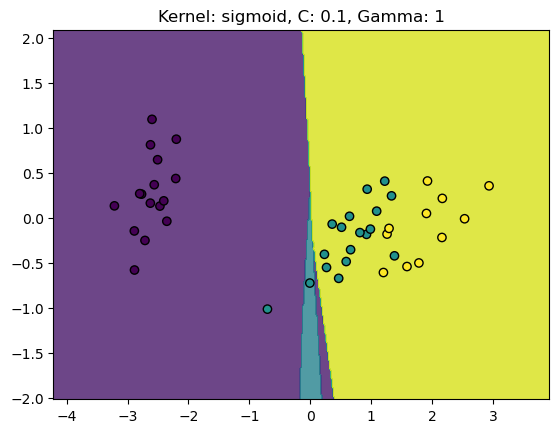

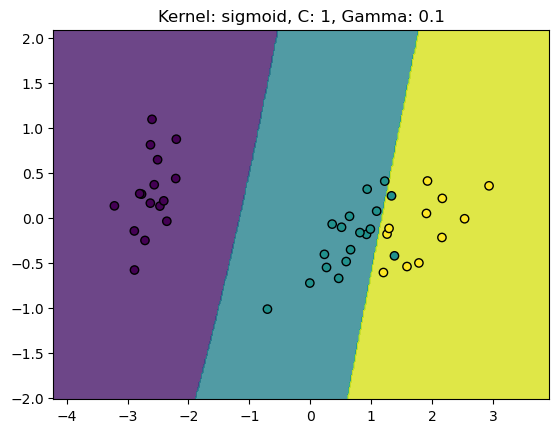

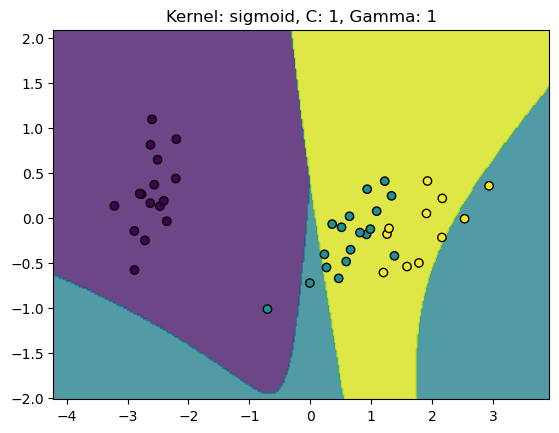

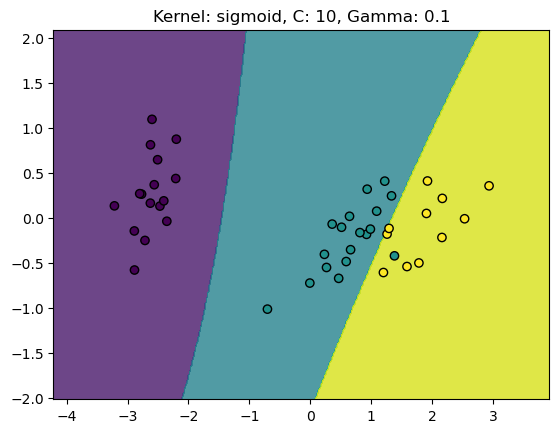

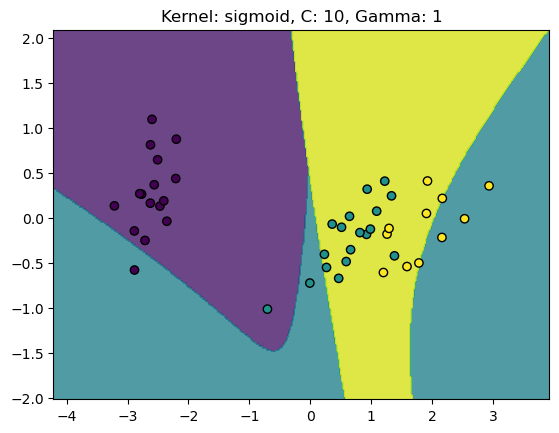

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 進行PCA降維到2D以便於可視化
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

# 定義繪圖函數
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# 測試不同參數組合並繪製決策邊界
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1]
degree_values = [2, 3]

for kernel in kernels:
    for C in C_values:
        for gamma in gamma_values:
            if kernel == 'linear':
                model = svm.SVC(kernel=kernel, C=C)
                title = f'Kernel: {kernel}, C: {C}'
            elif kernel == 'poly':
                for degree in degree_values:
                    model = svm.SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
                    title = f'Kernel: {kernel}, C: {C}, Gamma: {gamma}, Degree: {degree}'
                    model.fit(X_train_reduced, y_train)
                    plot_decision_boundary(model, X_test_reduced, y_test, title)
            else:
                model = svm.SVC(kernel=kernel, C=C, gamma=gamma)
                title = f'Kernel: {kernel}, C: {C}, Gamma: {gamma}'
                model.fit(X_train_reduced, y_train)
                plot_decision_boundary(model, X_test_reduced, y_test, title)

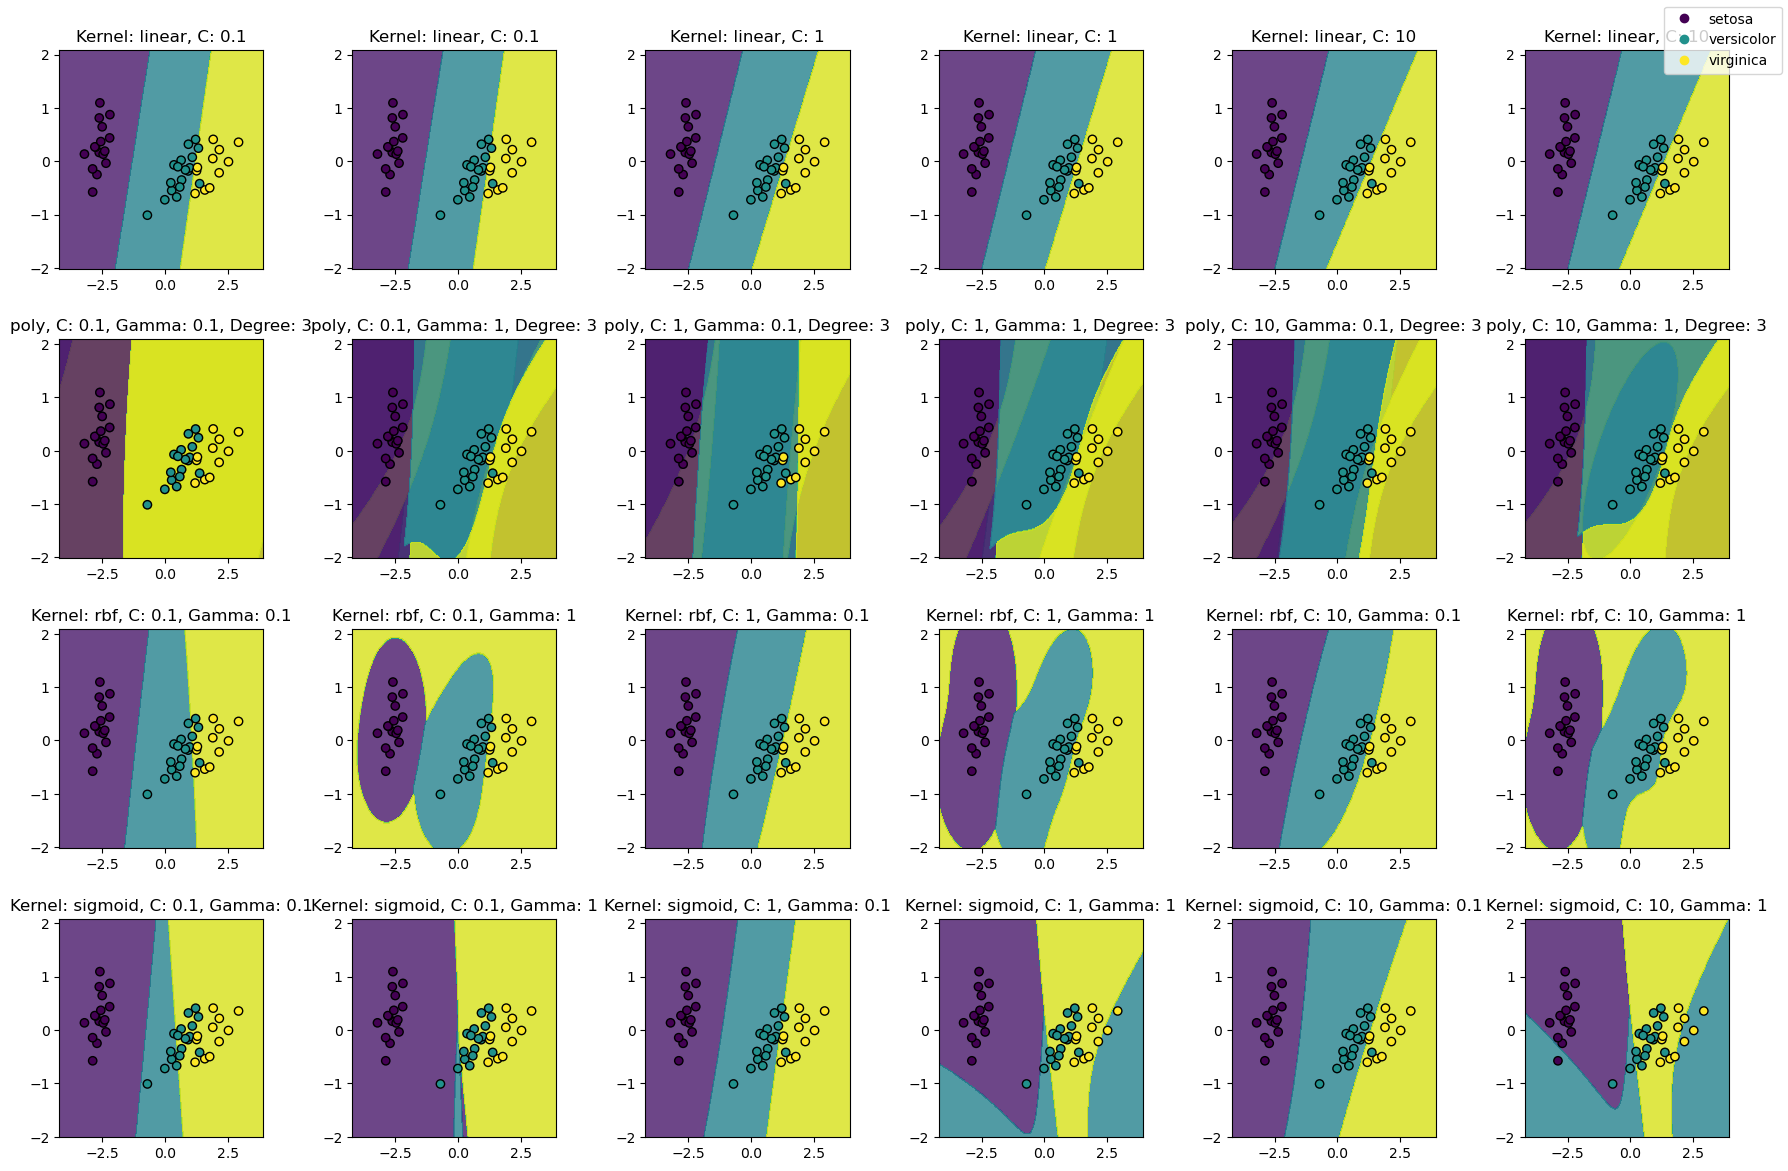

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm

# 進行PCA降維到2D以便於可視化
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

# 定義繪圖函數
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)
    return scatter

# 設置圖形
fig, axes = plt.subplots(4, 6, figsize=(18, 12))
fig.tight_layout(pad=3.0)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1]
degree_values = [2, 3]

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        for k, gamma in enumerate(gamma_values):
            ax = axes[i, j * 2 + k]
            if kernel == 'linear':
                model = svm.SVC(kernel=kernel, C=C)
                model.fit(X_train_reduced, y_train)
                title = f'Kernel: {kernel}, C: {C}'
                scatter = plot_decision_boundary(model, X_test_reduced, y_test, ax, title)
            elif kernel == 'poly':
                for degree in degree_values:
                    model = svm.SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
                    model.fit(X_train_reduced, y_train)
                    title = f'{kernel}, C: {C}, Gamma: {gamma}, Degree: {degree}'
                    scatter = plot_decision_boundary(model, X_test_reduced, y_test, ax, title)
            else:
                model = svm.SVC(kernel=kernel, C=C, gamma=gamma)
                model.fit(X_train_reduced, y_train)
                title = f'Kernel: {kernel}, C: {C}, Gamma: {gamma}'
                scatter = plot_decision_boundary(model, X_test_reduced, y_test, ax, title)

# 添加圖例
handles, labels = scatter.legend_elements()
fig.legend(handles, iris.target_names, loc='upper right')

plt.show()

## MNIST

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 載入 MNIST 資料集
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 資料標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定義參數調整函數
def svc_param_selection(X, y, nfolds):
    param_grid = [
        {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
        {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]},
        {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]},
        {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]}
    ]
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_

# 在訓練集上調整參數
best_params, best_score = svc_param_selection(X_train, y_train, 5)
print("Best parameters found:", best_params)
print("Best cross-validation score:", best_score)

# 使用最佳參數重新訓練模型
best_svc = svm.SVC(kernel=best_params['kernel'], C=best_params['C'],
                   degree=best_params['degree'] if best_params['kernel'] == 'poly' else 3,
                   gamma=best_params.get('gamma', 'scale'))
best_svc.fit(X_train, y_train)

# 測試模型
accuracy = best_svc.score(X_test, y_test)
print("Test accuracy:", accuracy)

Best parameters found: {'C': 0.001, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}
Best cross-validation score: 0.9840985265288055
Test accuracy: 0.9833333333333333


## Breast Cancer

In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
X = data.data
y = data.target

# 資料標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定義參數調整函數
def svc_param_selection(X, y, nfolds):
    param_grid = [
        {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
        {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]},
        {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]},
        {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]}
    ]
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_

# 在訓練集上調整參數
best_params, best_score = svc_param_selection(X_train, y_train, 5)
print("Best parameters found:", best_params)
print("Best cross-validation score:", best_score)

# 使用最佳參數重新訓練模型
best_svc = svm.SVC(kernel=best_params['kernel'], C=best_params['C'],
                   degree=best_params['degree'] if best_params['kernel'] == 'poly' else 3,
                   gamma=best_params.get('gamma', 'scale'))
best_svc.fit(X_train, y_train)

# 測試模型
y_pred = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters found: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.9748101265822784
Test accuracy: 0.9766081871345029
